In [10]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


test = pd.read_csv('Test Data.csv')
test['risk_flag'] = -1
sample = pd.read_csv('Sample Prediction Dataset.csv')
train = pd.read_csv('Training Data.csv')

data = pd.concat([train,test])

## 1.Column Types

In [4]:
train.columns

Index(['id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [8]:
num_cols = [ 'income', 'age', 'experience', 'current_job_years','current_house_years']
cat_cols = ['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']

In [3]:
print('no risk', round(train['risk_flag'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('risks', round(train['risk_flag'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

no risk 87.7 % of the dataset
risks 12.3 % of the dataset


C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 20.0)

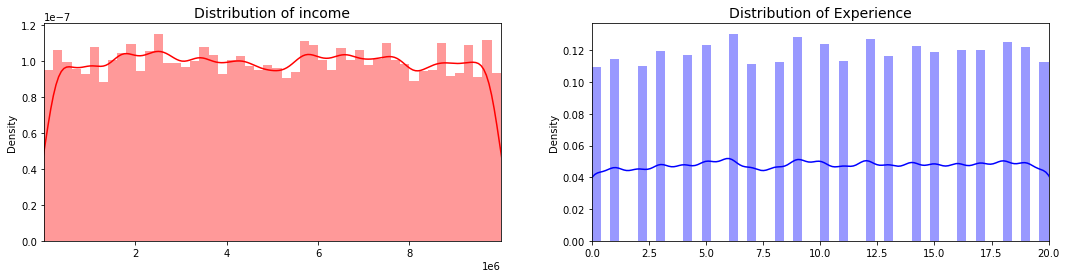

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

income_val = train['income'].values
experience_val = train['experience'].values

sns.distplot(income_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of income', fontsize=14)
ax[0].set_xlim([min(income_val), max(income_val)])

sns.distplot(experience_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Experience', fontsize=14)
ax[1].set_xlim([min(experience_val), max(experience_val)])

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

for i in num_cols:
    rob_scaler = RobustScaler()

    data[i] = rob_scaler.fit_transform(data[i].values.reshape(-1,1))